In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
df=pd.read_csv('D:\\Data-Science\\exercisedata\\titanic_data.csv')
df.head(5)#先显示出前5行，观察有哪些数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


mean-平均数，std-标准差

In [5]:
df.describe()#针对于数值型数据

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
数据概况：
PassengerId：乘客序号；
Survived：最终是否存活（1表示存活，0表示未存活）；
Pclass：舱位，1是头等舱，3是最低等；
Name：乘客姓名；
Sex：性别；
Age：年龄；
SibSp：一同上船的兄弟姐妹或配偶；
Parch：一同上船的父母或子女；
Ticket：船票信息；
Fare：乘客票价，决定了Pclass的等级；
Cabin：客舱编号，不同的编号对应不同的位置；
Embarked：上船地点，主要是S（南安普顿）、C（瑟堡）、Q（皇后镇）。

欲想探讨的问题：
存活率与哪些因素有关？
猜想影响因素有：Pclass、Sex、Age、SibSp、Parch、Ticket、Cabin、Embarked

整体的存活率：通过下面可以看出船员整体的存活率约为39%。

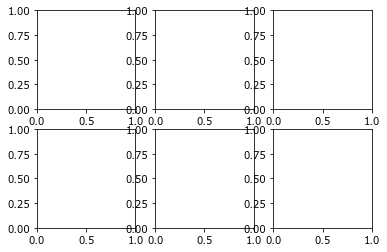

In [3]:
fig,axes=plt.subplots(2,3)

In [4]:
survived_rate=float(df['Survived'].sum())/df['Survived'].count()#加float是为了让小数结果显示出来
survived_rate
print df['Survived'].sum()
print df['Survived'].count()

342
891


1、存活率与Pclass的关系:可以看出两者有强烈的相关关系，Pclass等级越高（1最高），存活率越高。

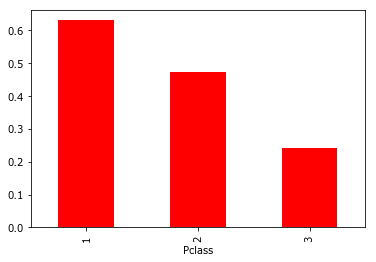

In [6]:
Pclass_survived_rate=(df.groupby(['Pclass']).sum()/df.groupby(['Pclass']).count())['Survived']
Pclass_survived_rate.plot(kind='bar',color="red")#kind='bar'表示垂直柱状图、kind=‘barh’表示水平柱状图

2、存活率与Sex的关系:female的存活率是male的3倍还要多。

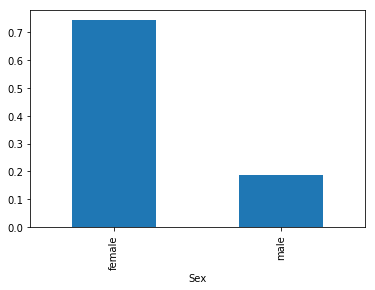

In [11]:
Sex_survived_rate=(df.groupby(['Sex']).sum()/df.groupby(['Sex']).count())['Survived']
Sex_survived_rate.plot(kind='bar')

3、存活率与Age的关系:通过折线图看出存活率与Age没有明确的关系。从柱状图上0-10岁的存活率要明显高于其他年龄段，并列出了存活率为0和1对应的几个年龄。

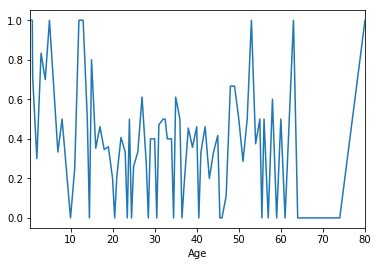

In [13]:
Sex_survived_rate=(df.groupby(['Age']).sum()/df.groupby(['Age']).count())['Survived']
Sex_survived_rate.plot()

In [61]:
max_survived_rate=(df.groupby(['Age']).sum()/df.groupby(['Age']).count())['Survived']
print max_survived_rate[max_survived_rate==1]#存活率为1对应的年龄
print max_survived_rate[max_survived_rate==0]#存活率为0对应的年龄

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
5.00     1.0
12.00    1.0
13.00    1.0
53.00    1.0
63.00    1.0
80.00    1.0
Name: Survived, dtype: float64
Age
10.0    0.0
14.5    0.0
20.5    0.0
23.5    0.0
24.5    0.0
28.5    0.0
30.5    0.0
34.5    0.0
36.5    0.0
40.5    0.0
45.5    0.0
46.0    0.0
55.5    0.0
57.0    0.0
59.0    0.0
61.0    0.0
64.0    0.0
65.0    0.0
66.0    0.0
70.0    0.0
70.5    0.0
71.0    0.0
74.0    0.0
Name: Survived, dtype: float64


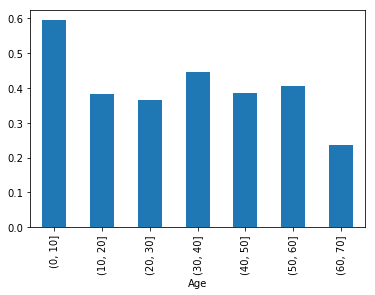

In [119]:
age_train_p=df[~np.isnan(df['Age'])]  #去除年龄数据中的NaN  
ages=np.arange(0,80,10)  #0~80岁，每10岁一段（年龄最大80岁）  
age_cut=pd.cut(age_train_p.Age,ages)  
age_cut_grouped=age_train_p.groupby(age_cut) 
age_Survival_Rate=(age_cut_grouped.sum()/age_cut_grouped.count())['Survived']  #计算每年龄段的存活率  
age_Survival_Rate.plot(kind='bar')

4、存活率与SibSp&Parch的关系:通过柱状图可以看出，当同行1-2个亲人朋友时的存活率更高。(这里将SibSp与Parch统一处理)

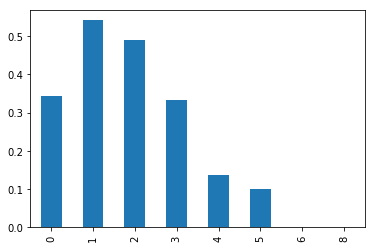

In [23]:
SibSp_Parch_survived_rate=((df.groupby(['SibSp']).sum()+df.groupby(['Parch']).sum())\
/(df.groupby(['SibSp']).count()+df.groupby(['Parch']).count()))['Survived']
SibSp_Parch_survived_rate.plot(kind='bar')

5、存活率与Cabin的关系:根据折线图看出没有明确的相关关系，再加上缺失数据过多687/891，所以存活率对Cabin可以暂且不计入考虑。

204


891

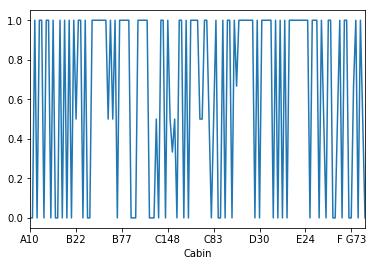

In [72]:
max_survived_rate=(df.groupby(['Cabin']).sum()/df.groupby(['Cabin']).count())['Survived']
max_survived_rate.plot()
print df['Cabin'].count()#除缺失值以外的数据个数
df['Cabin'].fillna(0).count()#所有数据个数

6、存活率与Embarked的关系:通过柱形图可以看出C、Q、S三地的存活率依次下降。

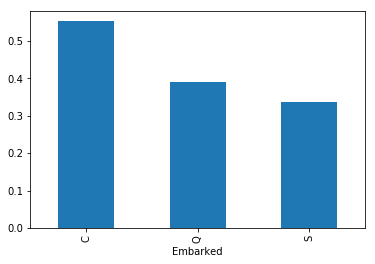

In [73]:
max_survived_rate=(df.groupby(['Embarked']).sum()/df.groupby(['Embarked']).count())['Survived']
max_survived_rate.plot(kind='bar')

综上所述：
1、存活率与Pclass的关系:Pclass等级越高（1最高），存活率越高。
2、存活率与Sex的关系:female的存活率是male的3倍还要多。
3、存活率与Age的关系:从折线图上看没有明确的关系，从柱状图上看0-10岁的存活率明显高于其他年龄段，存活率为0的年龄[10.0、46.0、57.0、59.0、61.0、64.0、65.0、66.0、70.0、70.5、71.0、74.0 ]，存活率为1的年龄[5.00、12.00、13.00、53.00、63.00、80.00]。
4、存活率与SibSp&Parch的关系:当同行1-2个亲人朋友时的存活率更高。
5、存活率与Cabin的关系:没有明确的相关关系，再加上缺失数据过多687/891，所以存活率对Cabin可以暂且不计入考虑。
6、存活率与Embarked的关系:C、Q、S三地的存活率依次下降，不过应该和登陆地本身是没啥关系的，登陆地可能最终体现在性别、舱位等级等方面。